# Data Initialization

In [1]:
# import libraries for data management
import numpy as np 
import pandas as pd
from sklearn import preprocessing

# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,6))

# import libraries for machine learning (decision tree)
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

<Figure size 1296x432 with 0 Axes>

In [2]:
# load datasets
full = pd.read_csv('ECommerce.csv',index_col = 'CustomerID')

# Data Exploration

In [3]:
# dataset head
full.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
# to view dataset info before cleansing
full.info()
full.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
Churn                          5630 non-null int64
Tenure                         5366 non-null float64
PreferredLoginDevice           5630 non-null object
CityTier                       5630 non-null int64
WarehouseToHome                5379 non-null float64
PreferredPaymentMode           5630 non-null object
Gender                         5630 non-null object
HourSpendOnApp                 5375 non-null float64
NumberOfDeviceRegistered       5630 non-null int64
PreferedOrderCat               5630 non-null object
SatisfactionScore              5630 non-null int64
MaritalStatus                  5630 non-null object
NumberOfAddress                5630 non-null int64
Complain                       5630 non-null int64
OrderAmountHikeFromlastYear    5365 non-null float64
CouponUsed                     5374 non-null float64
OrderCount                     5372 non-null float64
DayS

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


# Data Visualization

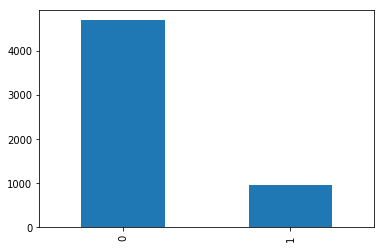

In [5]:
# check churn / not churn customers -> more unchurn customers than churn customers

ax=full['Churn'].value_counts().plot(kind='bar')

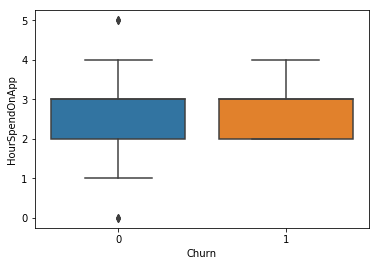

In [6]:
# check spread of HourSpendOnApp churn -> churn customers spend less time on App

ax=sns.boxplot(x=full['Churn'],y=full['HourSpendOnApp'])

# Data Cleansing

#### Total of 7 variables will need to be cleansed

#### Tenure (5366) / WarehouseToHome (5379) / HourSpendOnApp (5375) / OrderAmountHikeFromlastYear (5365) / CouponUsed (5374) / OrderCount (5372) / DaySinceLastOrder (5323)

### HourSpendOnApp

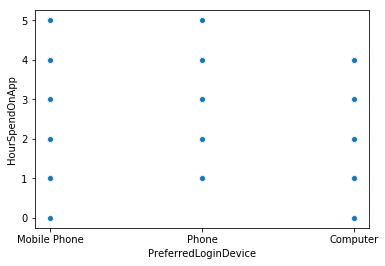

In [7]:
# visually determine whether there is correlation between HourSpendOnApp and the PreferredLoginDevice

sns.scatterplot(data=full, x='PreferredLoginDevice', y='HourSpendOnApp')

In [8]:
# examining the grouped preferred login device mean for HourSpendonApp

full.groupby(['PreferredLoginDevice',]).mean()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
PreferredLoginDevice,,,,,,,,,,,,,,
Computer,0.198286,9.635309,1.651163,15.958922,2.908916,3.722766,2.988984,4.109547,0.283966,15.770398,1.782498,3.082634,4.536062,173.538556
Mobile Phone,0.125859,11.806003,1.756962,15.620253,3.034720,3.800362,3.056058,4.543580,0.284268,15.721896,2.013250,3.442515,5.204857,197.895526
Phone,0.224208,6.904806,1.429732,15.220644,2.693625,3.393989,3.194151,3.612510,0.287571,15.598700,1.164094,1.999188,3.181154,135.680366


In [9]:
# grouping by PreferredLoginDevice and filling in the HourSpendOnApp mean for each group

full['HourSpendOnApp'].fillna(full.groupby(['PreferredLoginDevice'])['HourSpendOnApp'].transform('mean'),inplace=True)

In [10]:
# to view dataset info before cleansing

full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
Churn                          5630 non-null int64
Tenure                         5366 non-null float64
PreferredLoginDevice           5630 non-null object
CityTier                       5630 non-null int64
WarehouseToHome                5379 non-null float64
PreferredPaymentMode           5630 non-null object
Gender                         5630 non-null object
HourSpendOnApp                 5630 non-null float64
NumberOfDeviceRegistered       5630 non-null int64
PreferedOrderCat               5630 non-null object
SatisfactionScore              5630 non-null int64
MaritalStatus                  5630 non-null object
NumberOfAddress                5630 non-null int64
Complain                       5630 non-null int64
OrderAmountHikeFromlastYear    5365 non-null float64
CouponUsed                     5374 non-null float64
OrderCount                     5372 non-null float64
DayS

### WarehouseToHome

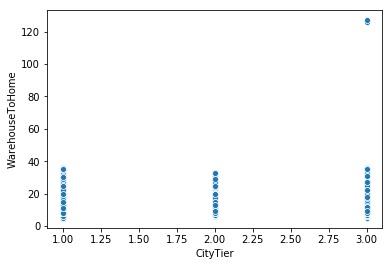

In [11]:
# visually determine whether there is a correlation between the City Tier of consumers and the Distance of Warehouse To Home
    # seems like it's evenly spread out, with the expections of the outliers for City Tier 3

sns.scatterplot(data=full, x='CityTier', y='WarehouseToHome')

In [12]:
full.groupby(['CityTier']).mean()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CityTier,,,,,,,,,,,,,
1,0.145117,10.528818,15.597399,2.928506,3.669667,3.073104,4.263775,0.284779,15.809154,1.730450,2.953255,4.514416,175.282079
2,0.198347,11.169725,14.978632,2.871493,3.665289,3.214876,4.326446,0.256198,15.100000,1.500000,2.584034,4.089744,177.622810
3,0.213705,9.361740,15.818991,2.920567,3.733449,3.032520,4.092334,0.289199,15.577499,1.828606,3.185185,4.674653,181.298978


In [13]:
# grouping by CityTier and filling in the WarehouseToHome mean for each group

full['WarehouseToHome'].fillna(full.groupby(['CityTier'])['WarehouseToHome'].transform('mean'),inplace=True)

In [14]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
Churn                          5630 non-null int64
Tenure                         5366 non-null float64
PreferredLoginDevice           5630 non-null object
CityTier                       5630 non-null int64
WarehouseToHome                5630 non-null float64
PreferredPaymentMode           5630 non-null object
Gender                         5630 non-null object
HourSpendOnApp                 5630 non-null float64
NumberOfDeviceRegistered       5630 non-null int64
PreferedOrderCat               5630 non-null object
SatisfactionScore              5630 non-null int64
MaritalStatus                  5630 non-null object
NumberOfAddress                5630 non-null int64
Complain                       5630 non-null int64
OrderAmountHikeFromlastYear    5365 non-null float64
CouponUsed                     5374 non-null float64
OrderCount                     5372 non-null float64
DayS

### Tenure

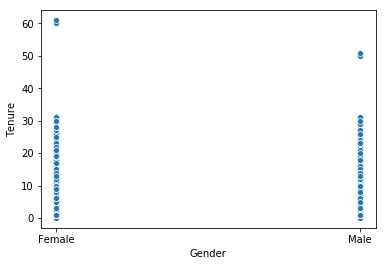

In [15]:
# visually determine whether there is correlation between Gender and Tenure
    # seems like male and female have generally the same Tenure; however for outlier / expectional cases, female tend to have
    # have higher Tenure than male

sns.scatterplot(data=full, x='Gender', y='Tenure')

In [16]:
full.groupby(['Gender']).mean()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Gender,,,,,,,,,,,,,,
Female,0.154942,10.682643,1.682992,15.650461,2.940294,3.716385,3.126447,4.313891,0.307213,15.709259,1.841412,3.122459,4.636535,178.744372
Male,0.177305,9.860740,1.635934,15.630691,2.912565,3.670804,3.027187,4.147754,0.270095,15.707020,1.691905,2.933681,4.481713,176.213298


In [17]:
# grouping by Gender and filling in the Tenure mean for each group

full['Tenure'].fillna(full.groupby(['Gender'])['Tenure'].transform('mean'),inplace=True)

In [18]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
Churn                          5630 non-null int64
Tenure                         5630 non-null float64
PreferredLoginDevice           5630 non-null object
CityTier                       5630 non-null int64
WarehouseToHome                5630 non-null float64
PreferredPaymentMode           5630 non-null object
Gender                         5630 non-null object
HourSpendOnApp                 5630 non-null float64
NumberOfDeviceRegistered       5630 non-null int64
PreferedOrderCat               5630 non-null object
SatisfactionScore              5630 non-null int64
MaritalStatus                  5630 non-null object
NumberOfAddress                5630 non-null int64
Complain                       5630 non-null int64
OrderAmountHikeFromlastYear    5365 non-null float64
CouponUsed                     5374 non-null float64
OrderCount                     5372 non-null float64
DayS

### Coupon Used

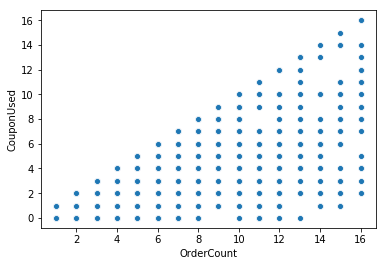

In [19]:
# visually determine whether there is correlation between CouponUsed and OrderCount
    # seems like the more coupons used the higher the order count (positive linear relationship)

sns.scatterplot(data=full, x='OrderCount', y='CouponUsed')

In [20]:
# prepare to full2 dataframe to drop the nan rows for both CouponUsed and OrderCount

full2 = full.dropna(subset = ['CouponUsed'], inplace=False)
full2 = full2.dropna(subset = ['OrderCount'], inplace=False)

In [21]:
# prepare x and y variables and linearly model the relationship
x = full2[['OrderCount']]
y = full2['CouponUsed']

model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# determine intercept

model.intercept_

0.28518233347145006

In [23]:
# determine coef

model.coef_

array([0.49105096])

In [24]:
# replace the nan CouponUsed rows with the linear relationship between OrderCount and CouponUsed

full['CouponUsed'].fillna(round(full.OrderCount * 0.49105096 + 0.28518233347145006,0), inplace = True)

In [25]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
Churn                          5630 non-null int64
Tenure                         5630 non-null float64
PreferredLoginDevice           5630 non-null object
CityTier                       5630 non-null int64
WarehouseToHome                5630 non-null float64
PreferredPaymentMode           5630 non-null object
Gender                         5630 non-null object
HourSpendOnApp                 5630 non-null float64
NumberOfDeviceRegistered       5630 non-null int64
PreferedOrderCat               5630 non-null object
SatisfactionScore              5630 non-null int64
MaritalStatus                  5630 non-null object
NumberOfAddress                5630 non-null int64
Complain                       5630 non-null int64
OrderAmountHikeFromlastYear    5365 non-null float64
CouponUsed                     5630 non-null float64
OrderCount                     5372 non-null float64
DayS

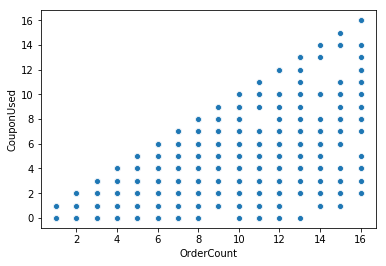

In [26]:
# rechecking integrity between CouponUsed and OrderCount

sns.scatterplot(data=full, x='OrderCount', y='CouponUsed')

### OrderCount

In [27]:
# similar to above but swapping x and y variable

# prepare x and y variables and linearly model the relationship
y = full2['OrderCount']
x = full2[['CouponUsed']]

model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# determine intercept

model.intercept_

0.9738270014063504

In [29]:
# determine coef

model.coef_

array([1.13102243])

In [30]:
# replace the nan CouponUsed rows with the linear relationship between OrderCount and CouponUsed

full['OrderCount'].fillna(round(full.CouponUsed * 1.13102243 + 0.9738270014063504,0), inplace = True)

In [31]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
Churn                          5630 non-null int64
Tenure                         5630 non-null float64
PreferredLoginDevice           5630 non-null object
CityTier                       5630 non-null int64
WarehouseToHome                5630 non-null float64
PreferredPaymentMode           5630 non-null object
Gender                         5630 non-null object
HourSpendOnApp                 5630 non-null float64
NumberOfDeviceRegistered       5630 non-null int64
PreferedOrderCat               5630 non-null object
SatisfactionScore              5630 non-null int64
MaritalStatus                  5630 non-null object
NumberOfAddress                5630 non-null int64
Complain                       5630 non-null int64
OrderAmountHikeFromlastYear    5365 non-null float64
CouponUsed                     5630 non-null float64
OrderCount                     5630 non-null float64
DayS

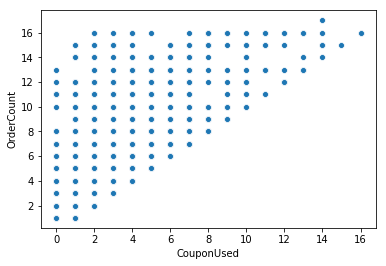

In [32]:
# rechecking integrity between OrderCount and CouponUsed

sns.scatterplot(data=full, x='CouponUsed', y='OrderCount')

### OrderAmountHikeFromlastYear / DaySinceLastOrder

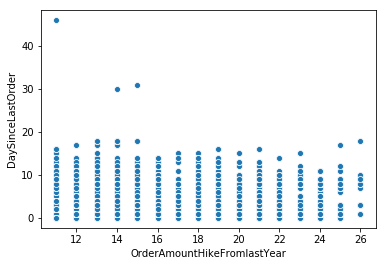

In [33]:
sns.scatterplot(data=full, x='OrderAmountHikeFromlastYear', y='DaySinceLastOrder')

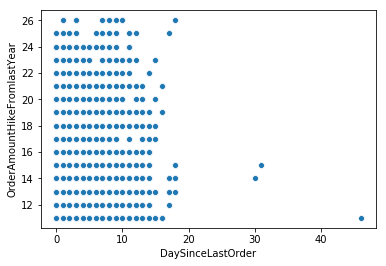

In [34]:
sns.scatterplot(data=full, x='DaySinceLastOrder', y='OrderAmountHikeFromlastYear')

In [35]:
# grouping by SatisfactionScore and filling in the OrderAmountHikeFromlastYear / DaySinceLastOrder mean for each group

full['OrderAmountHikeFromlastYear'].fillna(full.groupby(['SatisfactionScore'])['OrderAmountHikeFromlastYear'].transform('mean'),inplace=True)
full['DaySinceLastOrder'].fillna(full.groupby(['SatisfactionScore'])['DaySinceLastOrder'].transform('mean'),inplace=True)

In [36]:
# 19 features and 5630 samples left

full_final = full
full_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
Churn                          5630 non-null int64
Tenure                         5630 non-null float64
PreferredLoginDevice           5630 non-null object
CityTier                       5630 non-null int64
WarehouseToHome                5630 non-null float64
PreferredPaymentMode           5630 non-null object
Gender                         5630 non-null object
HourSpendOnApp                 5630 non-null float64
NumberOfDeviceRegistered       5630 non-null int64
PreferedOrderCat               5630 non-null object
SatisfactionScore              5630 non-null int64
MaritalStatus                  5630 non-null object
NumberOfAddress                5630 non-null int64
Complain                       5630 non-null int64
OrderAmountHikeFromlastYear    5630 non-null float64
CouponUsed                     5630 non-null float64
OrderCount                     5630 non-null float64
DayS

## Data Transformation

### Normalization (z-score)

#### Tenure / HourSpendOnApp / WarehouseToHome / DaySinceLastOrder / OrderAmountHikeFromlastYear / CashbackAmount

In [37]:
full_final2 = full_final

In [38]:
# Tenure

zscore_scaler = preprocessing.StandardScaler().fit(full_final[['Tenure']])
full_final['Tenure_zscore']=zscore_scaler.transform(full_final[['Tenure']])
full_final = full_final.drop(['Tenure'],axis='columns')

In [39]:
# HourSpendOnApp

zscore_scaler = preprocessing.StandardScaler().fit(full_final[['HourSpendOnApp']])
full_final['HourSpendOnApp_zscore']=zscore_scaler.transform(full_final[['HourSpendOnApp']])
full_final = full_final.drop(['HourSpendOnApp'],axis='columns')

In [40]:
# WarehouseToHome

zscore_scaler = preprocessing.StandardScaler().fit(full_final[['WarehouseToHome']])
full_final['WarehouseToHome_zscore']=zscore_scaler.transform(full_final[['WarehouseToHome']])
full_final = full_final.drop(['WarehouseToHome'],axis='columns')

In [41]:
# DaySinceLastOrder

zscore_scaler = preprocessing.StandardScaler().fit(full_final[['DaySinceLastOrder']])
full_final['DaySinceLastOrder_zscore']=zscore_scaler.transform(full_final[['DaySinceLastOrder']])
full_final = full_final.drop(['DaySinceLastOrder'],axis='columns')

In [42]:
# OrderAmountHikeFromlastYear

zscore_scaler = preprocessing.StandardScaler().fit(full_final[['OrderAmountHikeFromlastYear']])
full_final['OrderAmountHikeFromlastYear_zscore']=zscore_scaler.transform(full_final[['OrderAmountHikeFromlastYear']])
full_final = full_final.drop(['OrderAmountHikeFromlastYear'],axis='columns')

In [43]:
# CashbackAmount

zscore_scaler = preprocessing.StandardScaler().fit(full_final[['CashbackAmount']])
full_final['CashbackAmount_zscore']=zscore_scaler.transform(full_final[['CashbackAmount']])
full_final = full_final.drop(['CashbackAmount'],axis='columns')

In [44]:
full_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
Churn                                 5630 non-null int64
PreferredLoginDevice                  5630 non-null object
CityTier                              5630 non-null int64
PreferredPaymentMode                  5630 non-null object
Gender                                5630 non-null object
NumberOfDeviceRegistered              5630 non-null int64
PreferedOrderCat                      5630 non-null object
SatisfactionScore                     5630 non-null int64
MaritalStatus                         5630 non-null object
NumberOfAddress                       5630 non-null int64
Complain                              5630 non-null int64
CouponUsed                            5630 non-null float64
OrderCount                            5630 non-null float64
Tenure_zscore                         5630 non-null float64
HourSpendOnApp_zscore                 5630 non-null float64
Wareh

### Normalization (min-max) [for clustering]

#### Tenure / HourSpendOnApp / WarehouseToHome / DaySinceLastOrder / OrderAmountHikeFromlastYear / CashbackAmount

In [45]:
# normalization for min-max is used for K-means clustering

min_max_scaler = preprocessing.MinMaxScaler().fit(full_final2[['Tenure']])
full_final2['Tenure']=min_max_scaler.transform(full_final2[['Tenure']])

min_max_scaler = preprocessing.MinMaxScaler().fit(full_final2[['HourSpendOnApp']])
full_final2['HourSpendOnApp']=min_max_scaler.transform(full_final2[['HourSpendOnApp']])

min_max_scaler = preprocessing.MinMaxScaler().fit(full_final2[['WarehouseToHome']])
full_final2['WarehouseToHome']=min_max_scaler.transform(full_final2[['WarehouseToHome']])

min_max_scaler = preprocessing.MinMaxScaler().fit(full_final2[['DaySinceLastOrder']])
full_final2['DaySinceLastOrder']=min_max_scaler.transform(full_final2[['DaySinceLastOrder']])

min_max_scaler = preprocessing.MinMaxScaler().fit(full_final2[['OrderAmountHikeFromlastYear']])
full_final2['OrderAmountHikeFromlastYear']=min_max_scaler.transform(full_final2[['OrderAmountHikeFromlastYear']])

min_max_scaler = preprocessing.MinMaxScaler().fit(full_final2[['CashbackAmount']])
full_final2['CashbackAmount']=min_max_scaler.transform(full_final2[['CashbackAmount']])

### One-Hot Encoding

#### PreferredLoginDevice / PreferredPaymentMode / Gender / PreferedOrderCat / MaritalStatus

In [46]:
# PreferredLoginDevice (baseline - Phone)

temp_dummy = pd.get_dummies(full_final['PreferredLoginDevice'])
full_final = pd.concat([full_final,temp_dummy],axis=1,sort=True)
full_final = full_final.drop(['PreferredLoginDevice','Phone'],axis='columns')

In [47]:
# PreferredPaymentMode (baseline - UPI)

temp_dummy = pd.get_dummies(full_final['PreferredPaymentMode'])
full_final = pd.concat([full_final,temp_dummy],axis=1,sort=True)
full_final = full_final.drop(['PreferredPaymentMode','UPI'],axis='columns')

In [48]:
# Gender (baseline - female)

temp_dummy = pd.get_dummies(full_final['Gender'])
full_final = pd.concat([full_final,temp_dummy],axis=1,sort=True)
full_final = full_final.drop(['Gender','Female'],axis='columns')

In [49]:
# PreferedOrderCat (baseline - others)

temp_dummy = pd.get_dummies(full_final['PreferedOrderCat'])
full_final = pd.concat([full_final,temp_dummy],axis=1,sort=True)
full_final = full_final.drop(['PreferedOrderCat','Others'],axis='columns')

In [50]:
# MaritalStatus (baseline - single)

temp_dummy = pd.get_dummies(full_final['MaritalStatus'])
full_final = pd.concat([full_final,temp_dummy],axis=1,sort=True)
full_final = full_final.drop(['MaritalStatus','Single'],axis='columns')

#### Data Preparation Evaluation

In [51]:
# total 30 features and 5630 samples

full_final.info()
full_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 30 columns):
Churn                                 5630 non-null int64
CityTier                              5630 non-null int64
NumberOfDeviceRegistered              5630 non-null int64
SatisfactionScore                     5630 non-null int64
NumberOfAddress                       5630 non-null int64
Complain                              5630 non-null int64
CouponUsed                            5630 non-null float64
OrderCount                            5630 non-null float64
Tenure_zscore                         5630 non-null float64
HourSpendOnApp_zscore                 5630 non-null float64
WarehouseToHome_zscore                5630 non-null float64
DaySinceLastOrder_zscore              5630 non-null float64
OrderAmountHikeFromlastYear_zscore    5630 non-null float64
CashbackAmount_zscore                 5630 non-null float64
Computer                              5630 non-null uint8
Mo

,Churn,CityTier,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CouponUsed,OrderCount,Tenure_zscore,HourSpendOnApp_zscore,...,Debit Card,E wallet,Male,Fashion,Grocery,Laptop & Accessory,Mobile,Mobile Phone,Divorced,Married
CustomerID,,,,,,,,,,,,,,,,,,,,,
50001,1,3,3,2,9,1,1.0,1.0,-0.74081,0.108090,...,1,0,0,0,0,1,0,0,0,0
50002,1,1,4,3,7,1,0.0,1.0,-0.03925,0.108090,...,0,0,1,0,0,0,1,0,0,0
50003,1,1,4,3,6,1,0.0,1.0,-0.03925,-1.307210,...,1,0,1,0,0,0,1,0,0,0
50004,1,3,4,5,8,0,0.0,1.0,-1.21963,-1.307210,...,1,0,1,0,0,1,0,0,0,0
50005,1,1,3,5,3,0,1.0,1.0,-1.21963,-0.325522,...,0,0,1,0,0,0,1,0,0,0


# Export CSV

In [52]:
# for Decision Tree / Logistic Regression / Naive Bayes

full_final.to_csv('ECommerce_Cleansed.csv')

# for K Means Clustering

full_final2.to_csv('ECommerce_Cleansed_Clustering.csv')